In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

1.Import the Data

In [3]:
customer_data=pd.read_csv('Data\Customer Data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_20236\2438110086.py:1: SyntaxWarning: invalid escape sequence '\C'
  customer_data=pd.read_csv('Data\Customer Data.csv')


In [4]:
customer_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
## Attribute Information
customer_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

2.Data Preprocessing And EDA(Exploratory Data Analysis)

Attribute Information:
* CUST_ID:-Unique Id of Every Customer
* BALANCE:- Balance of the Customer
* BALANCE_FREQUENCY:- How Frequently the Customer checks the balance
* PURCHASES:- Total Purchases made by the Customer
* ONEOFFPURCHASES:- Total One Time Purchases made by the Customer
* INSTALLMENTS_PURCHASES:- Total Purchases made in Installments
* CASH_ADVANCE:- Advance Cash by Customer Payed
* PURCHASES_FREQUENCY:- How Frequently the Customer Purchases
* ONEOFFPURCHASES_FREQUENCY:- How Frequently the Customer Purchases One Time
* CASH_ADVANCE_FREQUENCY:- How Frequently the Customer takes Cash Advance
* PURCHASES_INSTALLMENTS_FREQUENCY:- How Frequently the Customer Purchases in Installments
* CASH_ADVANCE_TRX:- Total Cash Advance Transactions
* PURCHASES_TRX:- Total Purchases Transactions
* DEBT_PAYMENTS:- Total Debt Payments
* PAYMENTS_CURRENT:- Total Payments made by Customer
* MINIMUM_PAYMENTS:- Total Minimum Payments made by Customer
* PRC_FULL_PAYMENT:- Full Payment By Customers
* TENURE:- Tenure of the Customer


In [6]:
customer_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<Axes: >

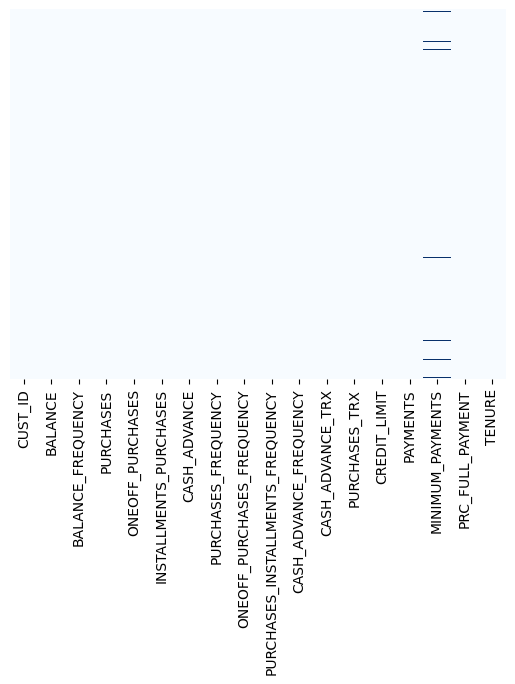

In [7]:
sns.heatmap(customer_data.isnull(),yticklabels=False,cbar=False,cmap="Blues")


In [8]:
##by this heatmap we saw that the MINIMUM_PAYMENTS  have good amount of null values other than that no one have null values.

In [9]:
customer_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
##here the MINIMUM_PAYMENTS and CREDIT_LIMIT have null values onto their columns so we will treat up them

In [11]:
columns_contains_nullValues=[columns for columns in customer_data.columns if customer_data[columns].isnull().sum()>0]

In [12]:
columns_contains_nullValues

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [13]:
'''So for treating null values we have diffrent methods
1.Fill Null Values With median

2.Fill Null Values With Mean

3.Fill Null Values With Zero

4.Remove the columns
Note:-but here we didnt remove the columns or fill with zero that genrally happens when the columns contains null values of the total values 50% atleast.
'''

'So for treating null values we have diffrent methods\n1.Fill Null Values With median\n\n2.Fill Null Values With Mean\n\n3.Fill Null Values With Zero\n\n4.Remove the columns\nNote:-but here we didnt remove the columns or fill with zero that genrally happens when the columns contains null values of the total values 50% atleast.\n'

In [14]:
'''
So for what we use mean or median we compare them
'''

'\nSo for what we use mean or median we compare them\n'

In [15]:
def distplots(df, columns, fill_type):
    plt.figure(figsize=(15, 5))
    sns.set(style="whitegrid")

    copy_data = df.copy()

    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Original data plot
        sns.kdeplot(data=df, x=col, label='Original', color='red',linewidth=5, fill=True)

        # Filling missing values
        if fill_type == "mean":
            copy_data[col] = copy_data[col].fillna(copy_data[col].mean())
        elif fill_type == "median":
            copy_data[col] = copy_data[col].fillna(copy_data[col].median())

        # Filled data plot
        sns.kdeplot(data=copy_data, x=col, label=fill_type.capitalize(), color='green',linewidth=3, fill=True)

        plt.title(f'Distribution of {col}')
        plt.legend()

    plt.tight_layout()
    plt.show()

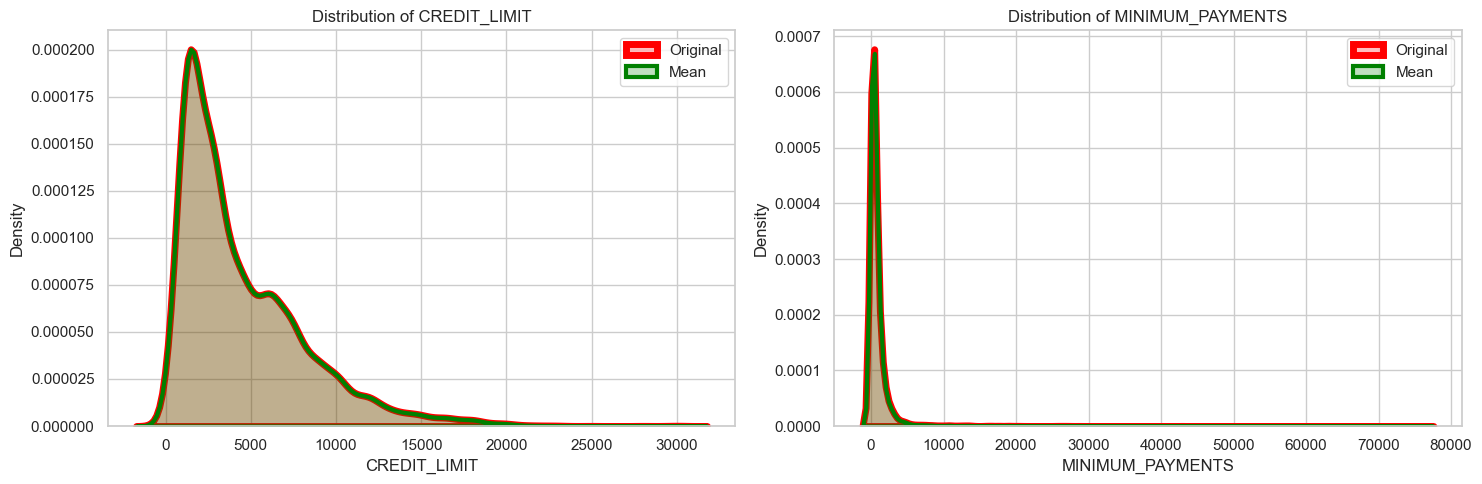

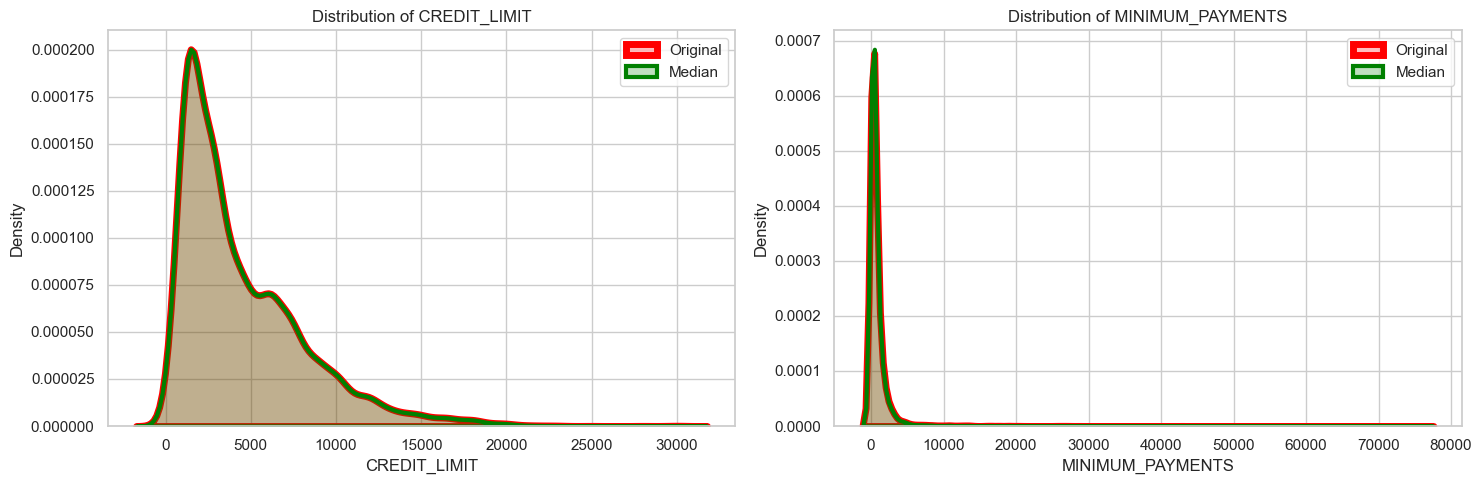

In [16]:
distplots(customer_data,columns_contains_nullValues,fill_type="mean")
distplots(customer_data,columns_contains_nullValues,fill_type="median")


In [17]:
from scipy.stats import skew
copy_data=customer_data.copy()
# Assuming 'columns_contains_nullValues' is a list of column names with missing values
for column in columns_contains_nullValues:
    # Drop NaN values before calculating skewness
    valid_data = copy_data[column].dropna()
    
    # Calculate skewness only if there's more than one unique value
    if valid_data.nunique() > 1:
        skewness = skew(valid_data)
    else:
        skewness = "Not Applicable (constant or insufficient data)"
    
    print(f"Skewness of {column}: {skewness}")


Skewness of CREDIT_LIMIT: 1.522208803328015
Skewness of MINIMUM_PAYMENTS: 13.620430990120362


In [18]:
##here skewness is much so there are chances of outliers .
###here we use mean because the median affects more to the normal distributions compare to mean so we can use mean

In [19]:
for column in columns_contains_nullValues:
    customer_data[column]=customer_data[column].fillna(customer_data[column].mean())

In [20]:
customer_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
##here we didnt need of customer_ID so we will remove it

In [22]:
customer_data.drop(columns='CUST_ID',inplace=True,axis=0)

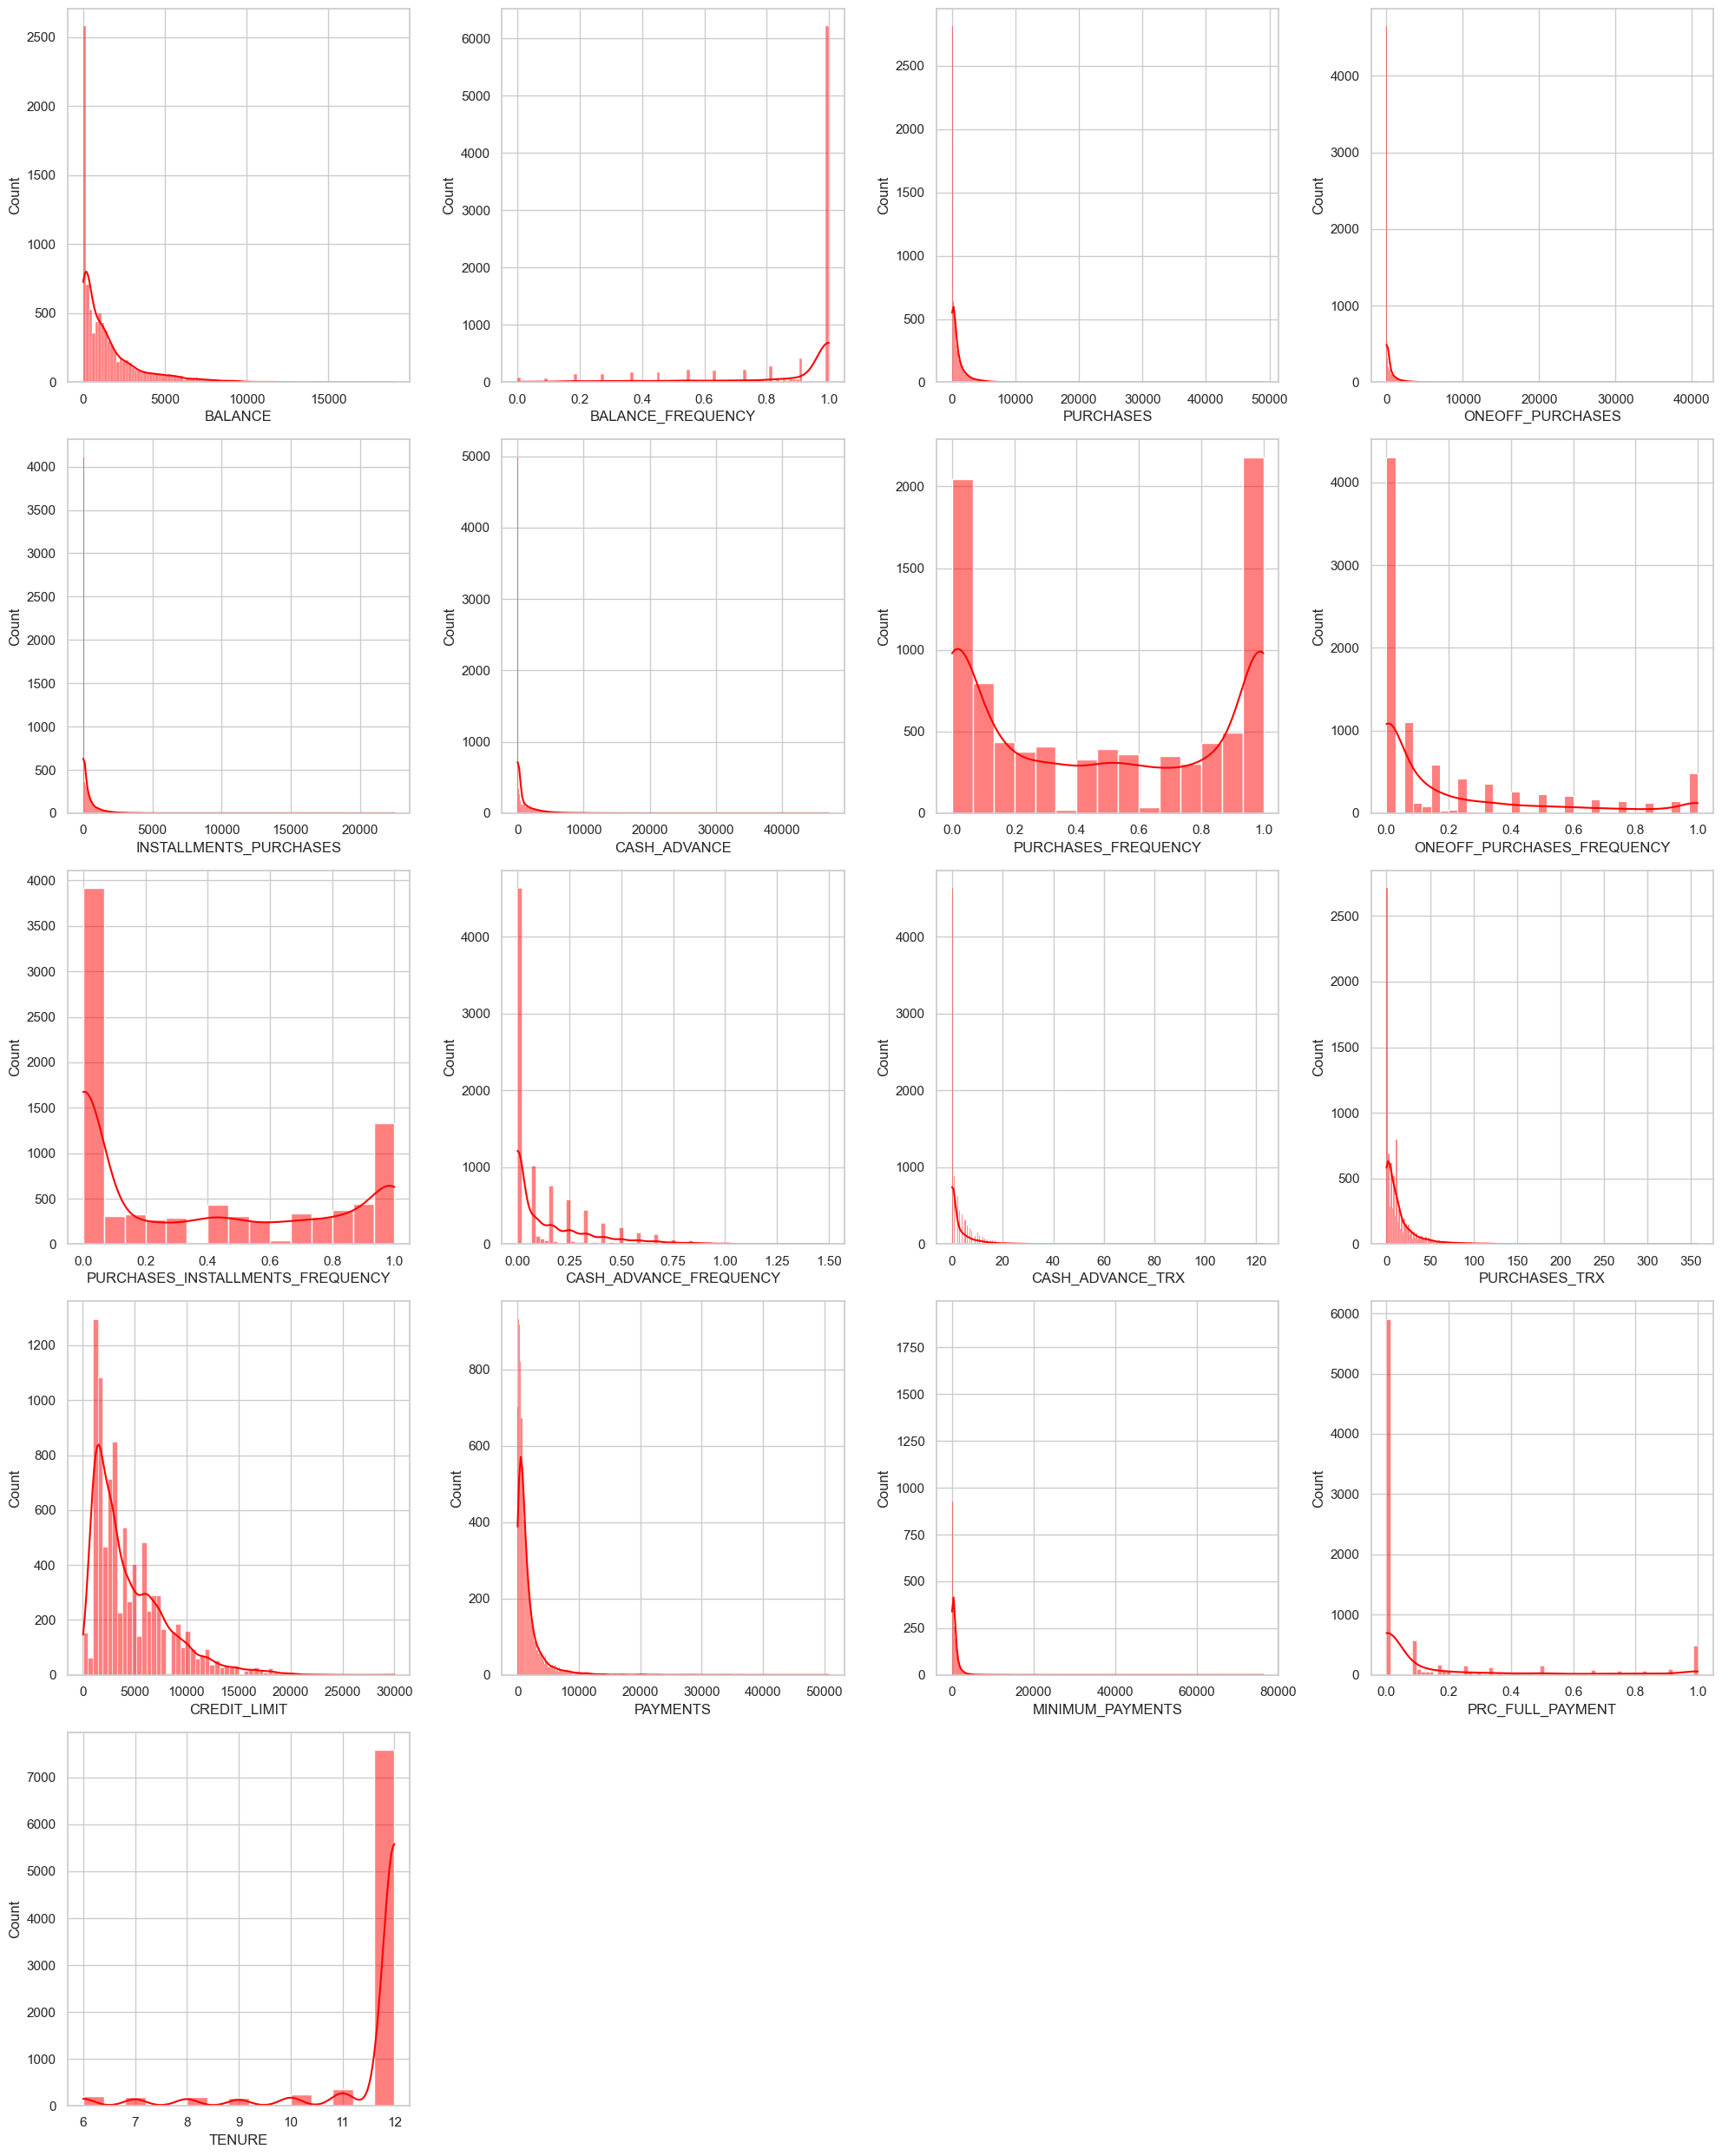

In [23]:
num_columns = len(customer_data.columns)
num_rows = (num_columns // 4) + 1 
plt.figure(figsize=(20, 5 * num_rows))  # Adjusted height dynamically
for i, col in enumerate(customer_data.columns):
    plt.subplot(num_rows, 4, i + 1)  
    sns.histplot(customer_data[col], kde=True, color='red') 
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

3.Oultier detection

### we have different techniques to detect outliers like 
* boxplot(IQR)
* Z-Score
* k-means 
* dbscan
* Isolation Forest
* Local Outlier Factor
* Elliptic Envelope
* One-Class SVM
* PCA
##### here we use boxplot,z-Score,LOR,Isolotation Forest to find the outliers on the data

##### boxplot method

In [24]:
##for boxplot method
##Visualization

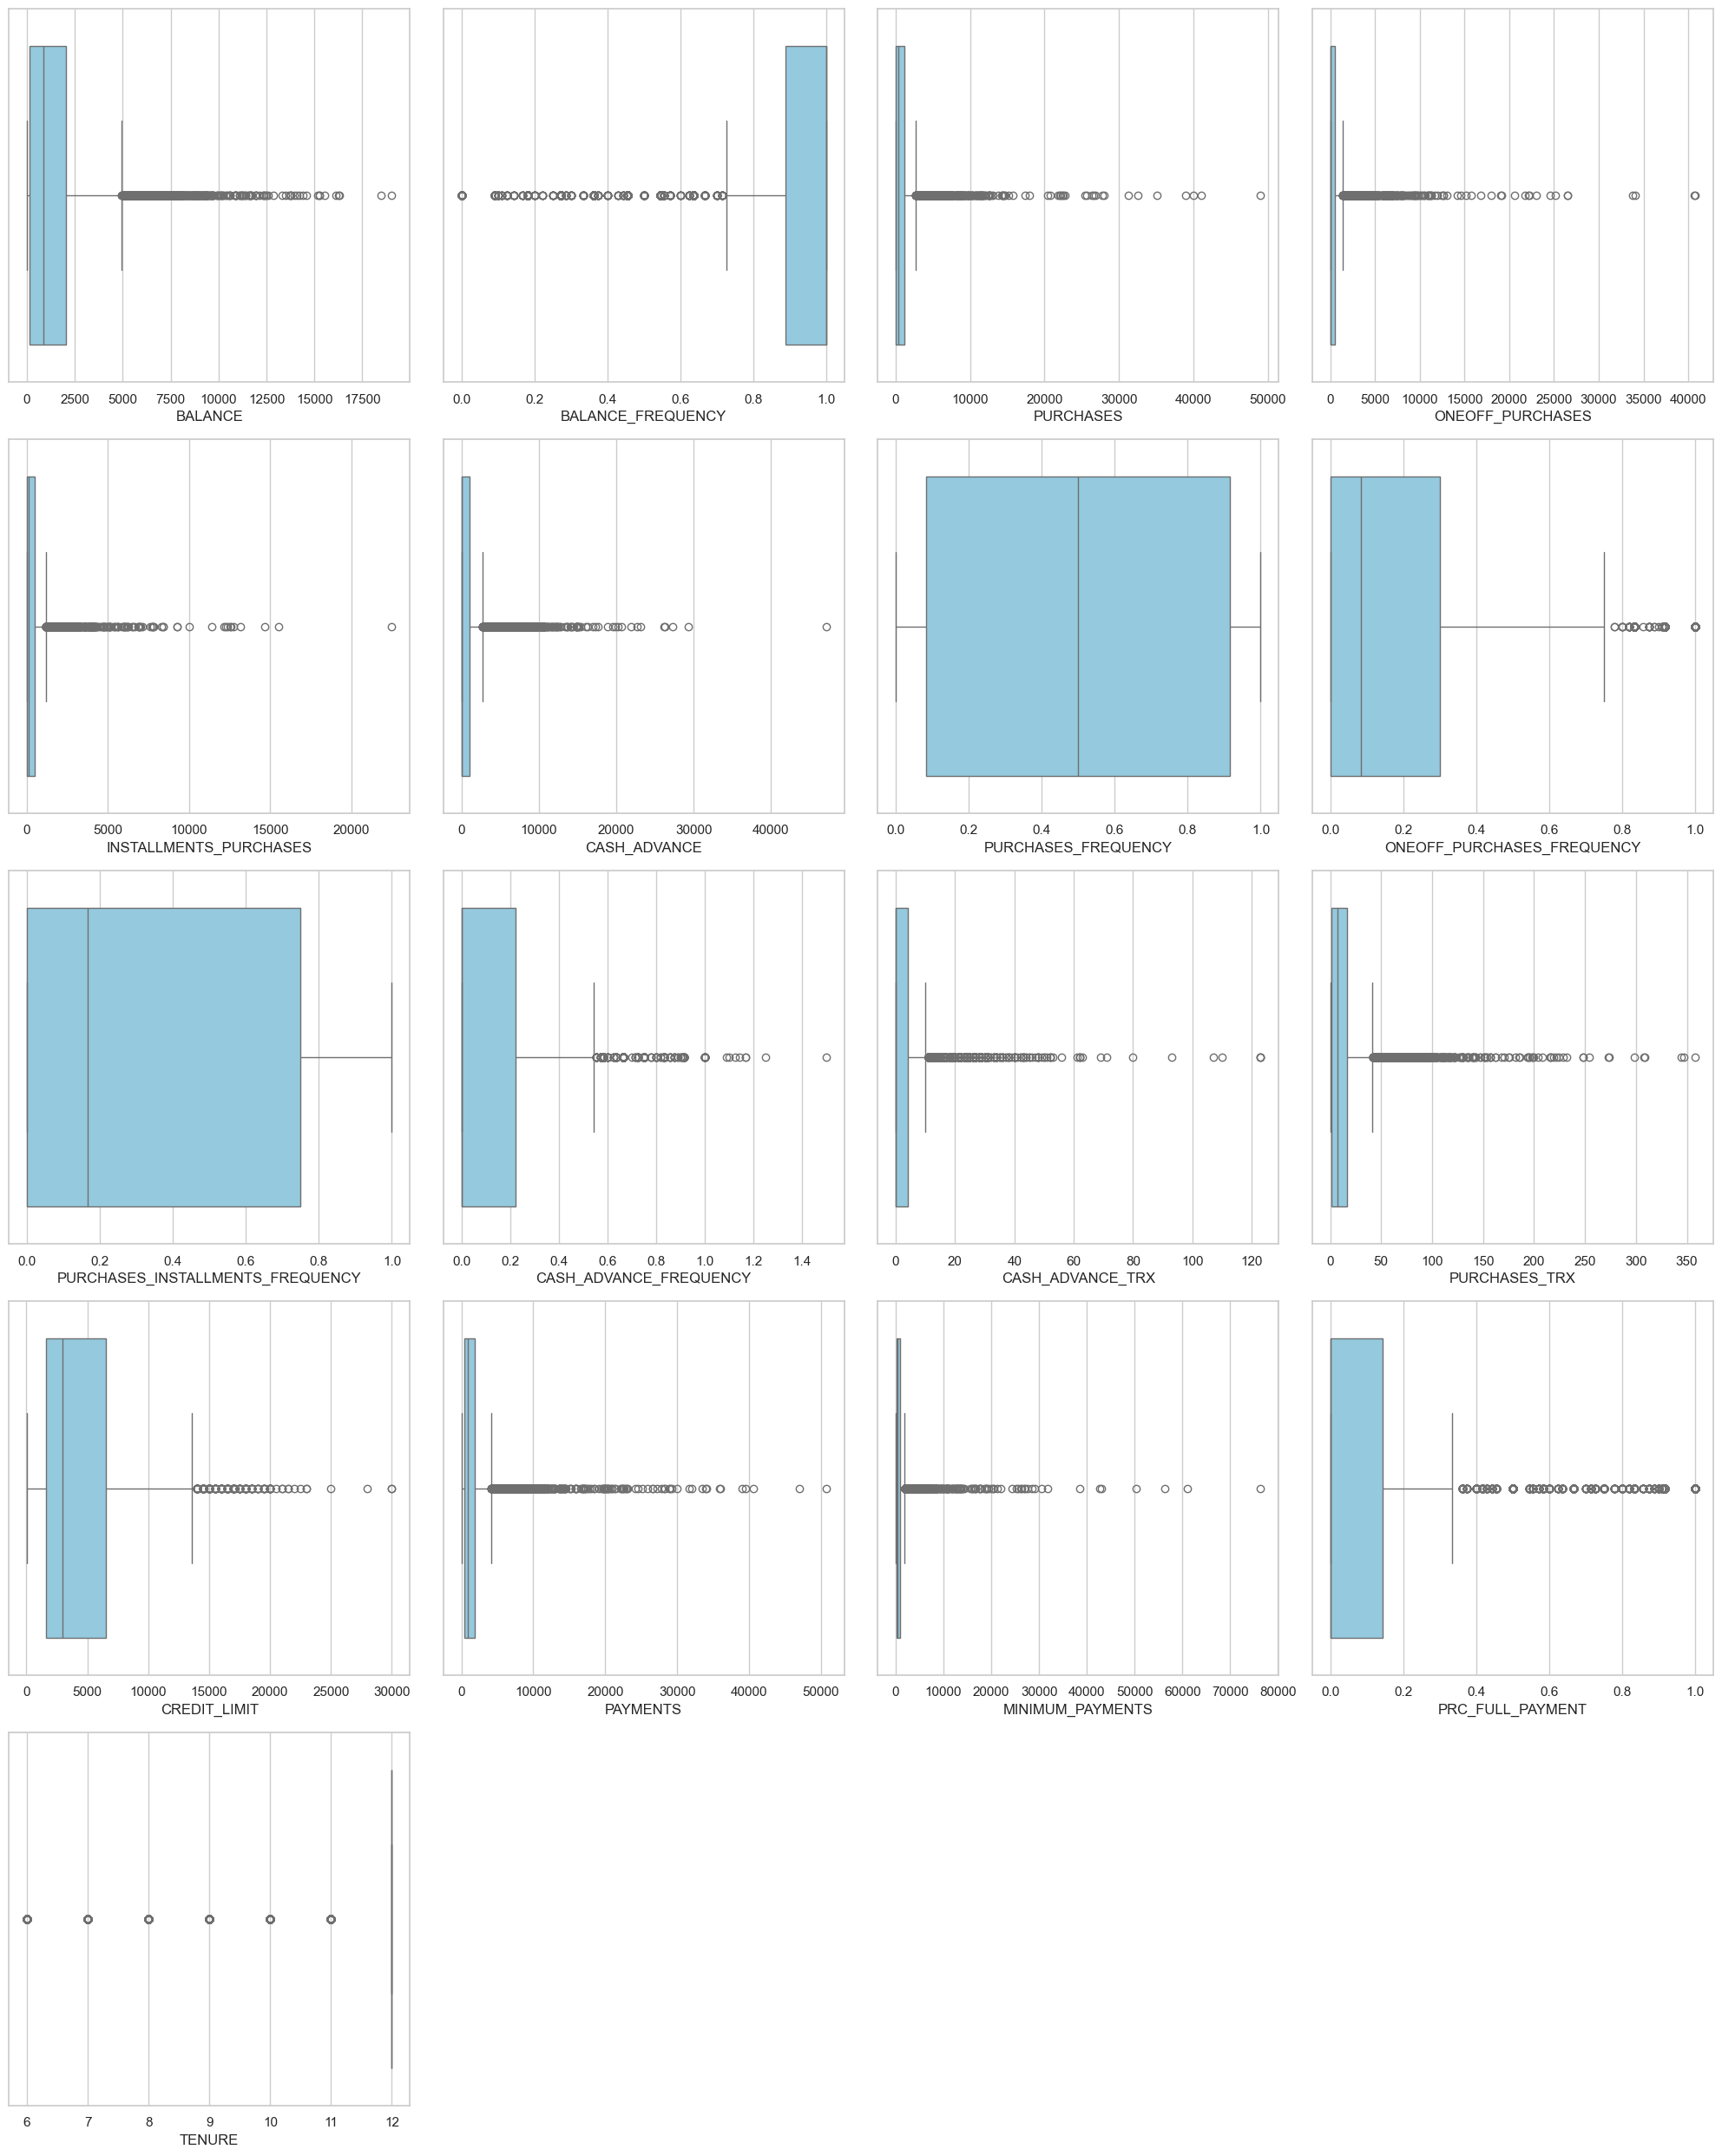

In [25]:
num_columns = len(customer_data.columns)
num_rows = (num_columns // 4) + 1 
plt.figure(figsize=(20, 5 * num_rows))  # Adjusted height dynamically
for i, col in enumerate(customer_data.columns):
    plt.subplot(num_rows, 4, i + 1)  
    sns.boxplot(data=customer_data, x=col,color='skyblue')
    plt.xlabel(col)
    plt.tight_layout()

In [26]:
def IQR(data):
    results = []
    for columns in data.columns:
        percentile75=data[columns].quantile(0.75)
        percentile25=data[columns].quantile(0.25)
        IQRRange=percentile75-percentile25 ##i
        outliers = data[(data[columns] > (percentile75+1.5*IQRRange)) | (data[columns] < (percentile25-1.5*IQRRange))]
        percentage=round(((len(outliers)/len(data))*100),2)
        if percentage>0:
            results.append((percentage,columns))
    return results

In [27]:
IQR(customer_data)


[(7.77, 'BALANCE'),
 (16.68, 'BALANCE_FREQUENCY'),
 (9.03, 'PURCHASES'),
 (11.32, 'ONEOFF_PURCHASES'),
 (9.69, 'INSTALLMENTS_PURCHASES'),
 (11.51, 'CASH_ADVANCE'),
 (8.74, 'ONEOFF_PURCHASES_FREQUENCY'),
 (5.87, 'CASH_ADVANCE_FREQUENCY'),
 (8.98, 'CASH_ADVANCE_TRX'),
 (8.56, 'PURCHASES_TRX'),
 (2.77, 'CREDIT_LIMIT'),
 (9.03, 'PAYMENTS'),
 (8.65, 'MINIMUM_PAYMENTS'),
 (16.47, 'PRC_FULL_PAYMENT'),
 (15.26, 'TENURE')]

##### 2. Z-Score method

In [28]:
def Z_ScoreOutlierDetection(data,threeshold=3):
    z_score_outliers=[]
    for column in data.columns:
        Z_score=((data[column]-np.mean(data[column]))/np.std(data[column]))
        outliers = data[np.abs(Z_score) > threeshold]
        percentage=((len(outliers)*100)/len(data))
        z_score_outliers.append((column,percentage))
    return z_score_outliers

In [29]:
Z_ScoreOutlierDetection(customer_data)

[('BALANCE', 2.189944134078212),
 ('BALANCE_FREQUENCY', 1.9664804469273742),
 ('PURCHASES', 1.5083798882681565),
 ('ONEOFF_PURCHASES', 1.3631284916201116),
 ('INSTALLMENTS_PURCHASES', 1.5307262569832403),
 ('CASH_ADVANCE', 2.0335195530726256),
 ('PURCHASES_FREQUENCY', 0.0),
 ('ONEOFF_PURCHASES_FREQUENCY', 0.0),
 ('PURCHASES_INSTALLMENTS_FREQUENCY', 0.0),
 ('CASH_ADVANCE_FREQUENCY', 2.223463687150838),
 ('CASH_ADVANCE_TRX', 1.9217877094972067),
 ('PURCHASES_TRX', 2.0670391061452515),
 ('CREDIT_LIMIT', 1.6983240223463687),
 ('PAYMENTS', 1.776536312849162),
 ('MINIMUM_PAYMENTS', 1.1396648044692737),
 ('PRC_FULL_PAYMENT', 0.0),
 ('TENURE', 4.402234636871508)]

##### 4.Outlier Removal
###### I Use Cap method for Outlier Removal
###### this cap method genrally convert the outliers to its upperlimit or lowerlimit respectively.

In [30]:
### I use the Cap method of Outlier Transformation here

def Oultier_Removal_Using_IQR(data):
    for columns in data.columns:
        percentile75=data[columns].quantile(0.75)
        percentile25=data[columns].quantile(0.25)
        IQRRange=percentile75-percentile25 ##i
        upper_limit=percentile75+1.5*IQRRange
        lower_limit=percentile25-1.5*IQRRange
        outliers = data[(data[columns] > (percentile75+1.5*IQRRange)) | (data[columns] < (percentile25-1.5*IQRRange))]
        data[columns] = np.where(data[columns] > upper_limit, upper_limit,
                          np.where(data[columns] < lower_limit, lower_limit, data[columns]))

In [31]:
Oultier_Removal_Using_IQR(customer_data)

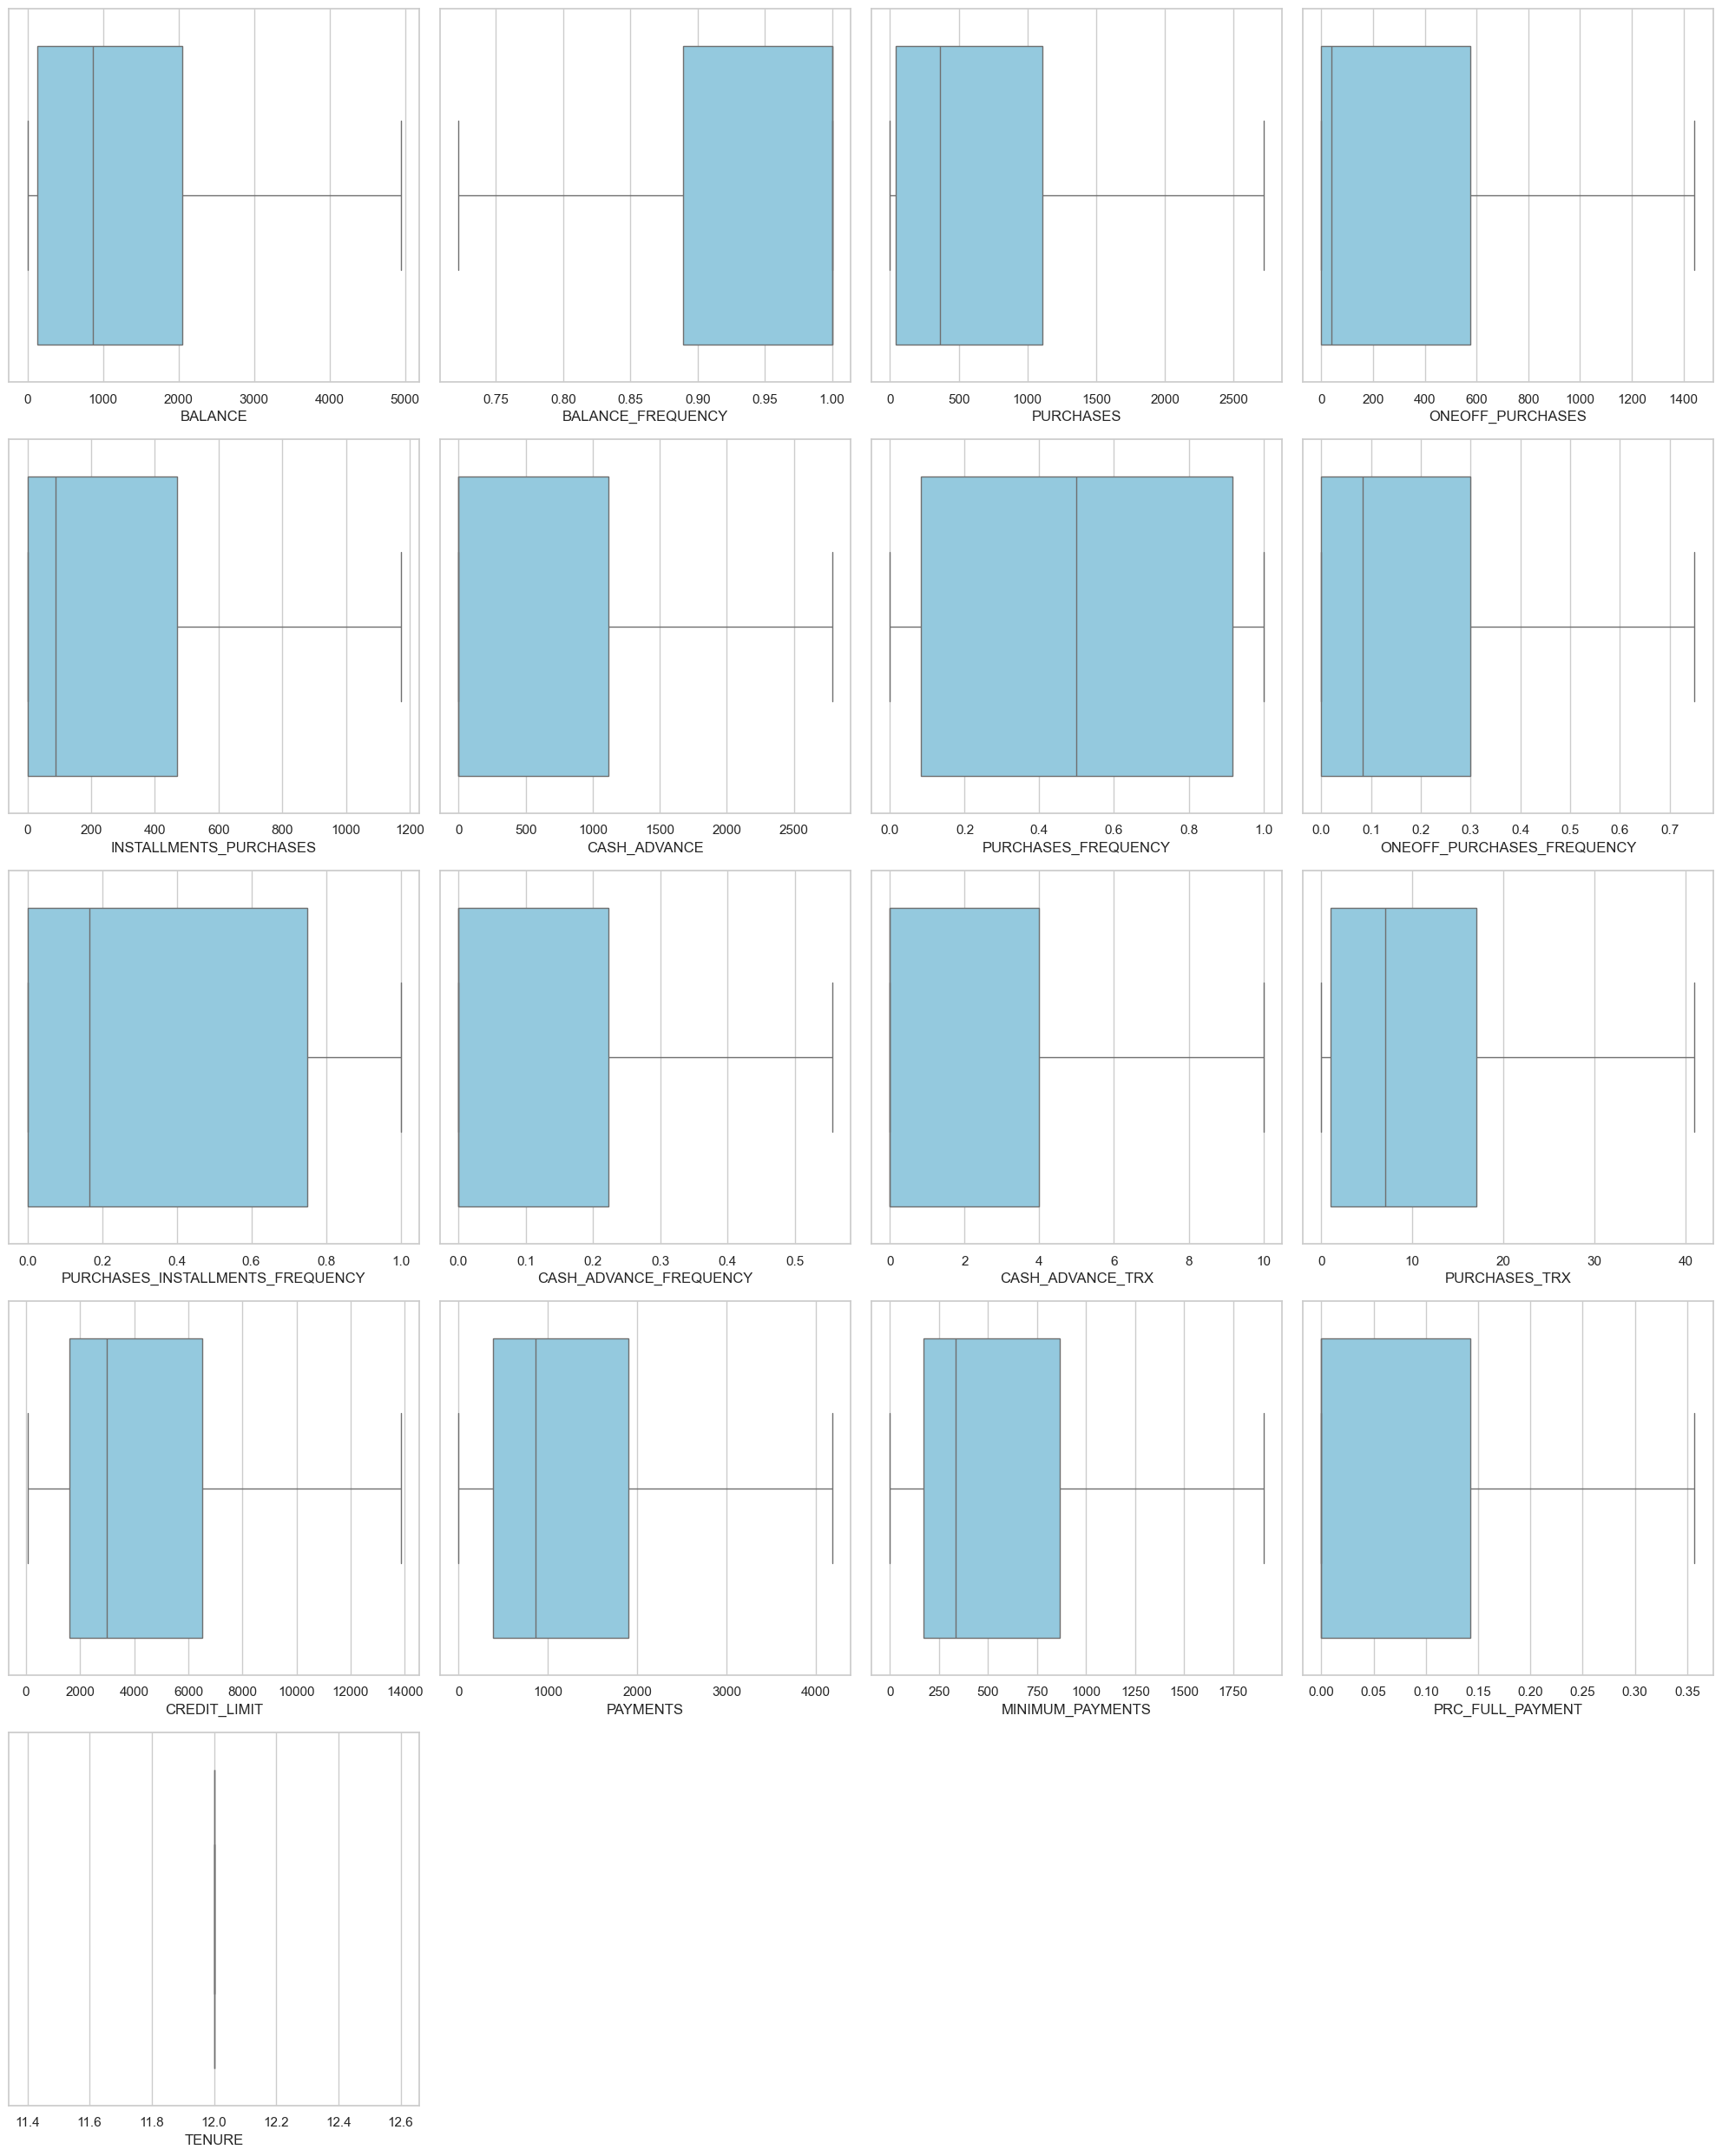

In [32]:
num_columns = len(customer_data.columns)
num_rows = (num_columns // 4) + 1 
plt.figure(figsize=(20, 5 * num_rows))  # Adjusted height dynamically
for i, col in enumerate(customer_data.columns):
    plt.subplot(num_rows, 4, i + 1)  
    sns.boxplot(data=customer_data, x=col,color='skyblue')
    plt.xlabel(col)
    plt.tight_layout()

In [33]:
IQR(customer_data)

[]

In [34]:
'''Observation :- So here all the Outliers We detect before are going according to their lower limit or upper limit'''

'Observation :- So here all the Outliers We detect before are going according to their lower limit or upper limit'

##### 5. Standard Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
scaler = StandardScaler()
customer_data_scaled=scaler.fit_transform(customer_data)

#### 6.Dimeonal Reduction Using PCA

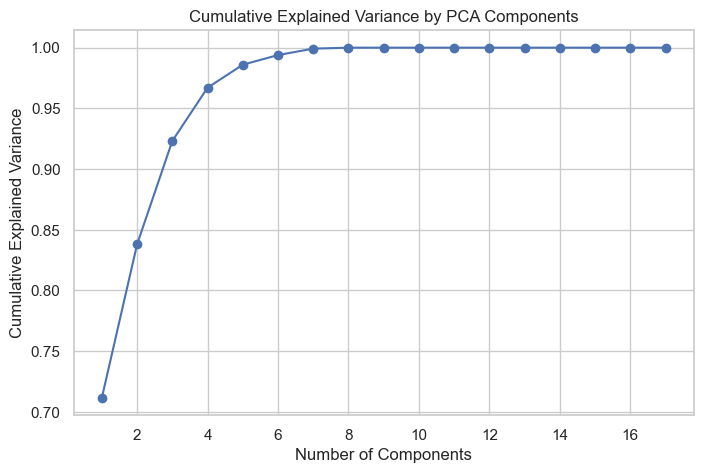

Number of components to retain 95% variance: 4


In [42]:

pca = PCA()
pca.fit(customer_data)

# Step 3: Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Step 4: Decide how many components to retain
# For example, if you want to retain 95% of the variance:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")


In [43]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=4)
principal_comp = pca.fit_transform(customer_data)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2","pca3","pca4"])
pca_df.head()

,pca1,pca2,pca3,pca4
0,-3930.063189,-562.933095,-513.074888,45.763504
1,3528.270511,2345.415740,810.037742,2001.750513
2,2987.670017,-501.365056,-1127.236466,-1073.452133
3,2794.805627,-1223.989631,-1004.007050,-1326.210006
4,-3458.365724,106.592847,-319.893804,-83.375323


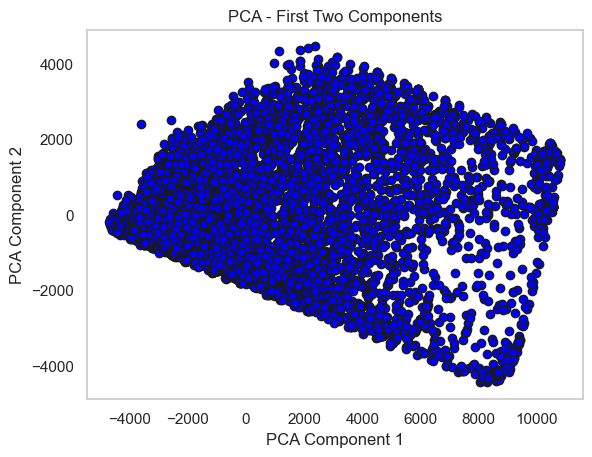

In [44]:
plt.scatter(pca_df['pca1'], pca_df['pca2'], c='blue', marker='o', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - First Two Components')
plt.grid()
plt.show()

#### 7.Hyperparameter Tunning

##### * Elbow Method for K-Means Clustering
##### 1. Distortion and Internia Calculations and also apply K-Means

In [45]:
# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
distortionmapping = {}
intertiamapping = {}
K = range(1, 10)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(customer_data_scaled)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(customer_data_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / customer_data_scaled.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    distortionmapping[k] = distortions[-1]
    intertiamapping[k] = inertias[-1]


In [46]:
distortionmapping

{1: 16.000000000000057,
 2: 12.260689522457575,
 3: 9.806625089019398,
 4: 8.599772344169152,
 5: 7.975753225400467,
 6: 7.506947658117228,
 7: 7.06365195822561,
 8: 6.60728061002785,
 9: 6.182450518720091}

In [47]:
intertiamapping

{1: 143200.0,
 2: 109733.17122599533,
 3: 87769.2945467237,
 4: 76967.9624803139,
 5: 71382.99136733409,
 6: 67187.18154014906,
 7: 63219.68502611949,
 8: 59135.16145974924,
 9: 55332.932142545025}


##### 2. Visualizing the Intertia and Distortion

Distortion values:
1 : 16.000000000000057
2 : 12.260689522457575
3 : 9.806625089019398
4 : 8.599772344169152
5 : 7.975753225400467
6 : 7.506947658117228
7 : 7.06365195822561
8 : 6.60728061002785
9 : 6.182450518720091


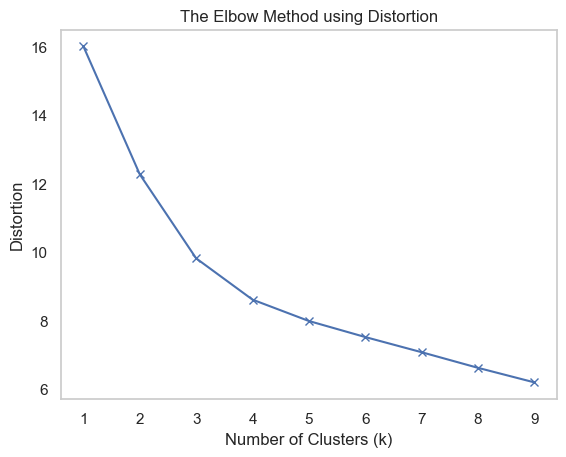

In [48]:
print("Distortion values:")
for key, val in distortionmapping.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()

Inertias values:
1 : 143200.0
2 : 109733.17122599533
3 : 87769.2945467237
4 : 76967.9624803139
5 : 71382.99136733409
6 : 67187.18154014906
7 : 63219.68502611949
8 : 59135.16145974924
9 : 55332.932142545025


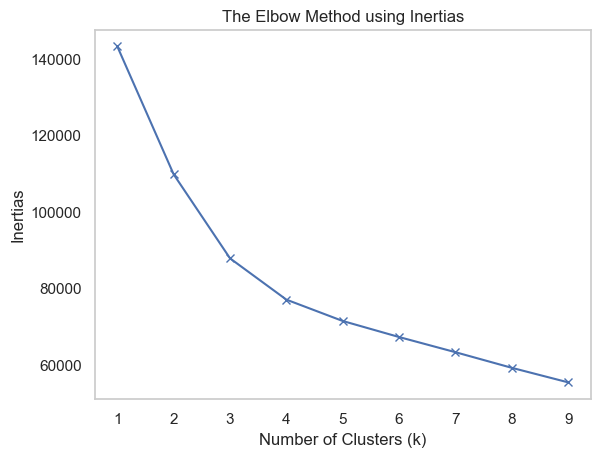

In [49]:
print("Inertias values:")
for key, val in intertiamapping.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.grid()
plt.show()

#### Hyperparamter tunning and Silhoutte Score

In [50]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
# Spectral clustering
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

In [53]:
clusters=[3,4,5,6]
for cluster in clusters:
    train_spectral(cluster,customer_data_scaled)

Spectral Clustering : clusters :  3  silhouette_score :  0.19132446659442798
Spectral Clustering : clusters :  4  silhouette_score :  0.18408474435225752
Spectral Clustering : clusters :  5  silhouette_score :  0.18014607726383827
Spectral Clustering : clusters :  6  silhouette_score :  0.1792865177564009


In [54]:
for cluster in clusters:
    train_GaussianMixture(cluster,customer_data_scaled)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.1337088438916313
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.11015043123273965
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.1255915260784334
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.06263890207860218


In [55]:
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
  for i in clusters:
    train_Agglomerative(lin,i,customer_data_scaled)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.21790013459668714
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.16432982383055342
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.16694333373342657
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.1561796584086786
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.166835290584893
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.16035668115760818
Agglomerative Clustering : clusters :  5  linkage :  complete  silhouette_score :  0.146109669110939
Agglomerative Clustering : clusters :  6  linkage :  complete  silhouette_score :  0.13595254916616634
Agglomerative Clustering : clusters :  3  linkage :  average  silhouette_score :  0.22854260261868056
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.20391957890

##### 8.Clustering Algorithm

##### 1.Mean Shift Algorithm

In [70]:
from sklearn.cluster import MeanShift,estimate_bandwidth
import matplotlib.pyplot as plt

def mean_shift(df):
    copy_scaled_df = df.copy()
    bandwidth = estimate_bandwidth(copy_scaled_df, quantile=0.1, n_samples=500)
    # Perform mean shift clustering
    ms_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms_model.fit(copy_scaled_df)
    labels = ms_model.labels_
    mean_shift_centers = ms_model.cluster_centers_
    # Plot the results
    plt.scatter(copy_scaled_df.iloc[:, 0], copy_scaled_df.iloc[:, 1], c=labels, cmap='plasma', marker='p')
    plt.scatter(mean_shift_centers[:, 0], mean_shift_centers[:, 1], s=250, c='blue', marker='X')
    plt.title('Mean Shift Clustering')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

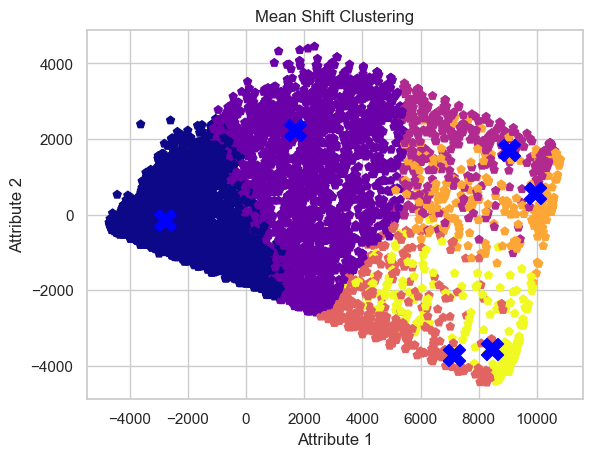

In [72]:
mean_shift(pca_df)

#### 2.K-Means Algorithm

In [118]:

def KmeansClustering(df,total_clusters):
    kmeans = KMeans(n_clusters=total_clusters, random_state=0, n_init="auto").fit(df)
    kmeans.fit_predict(df)
    pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
    plt.figure(figsize=(8,8))
    #palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
    ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
    plt.title("Clustering using K-Means Algorithm")
    plt.show()
    ####Extended Code After Model Selection
    # find all cluster centers
    
    ##cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
    # inverse transfor the data
    ####cluster_centers = scalar.inverse_transform(cluster_centers)
    return kmeans.labels_

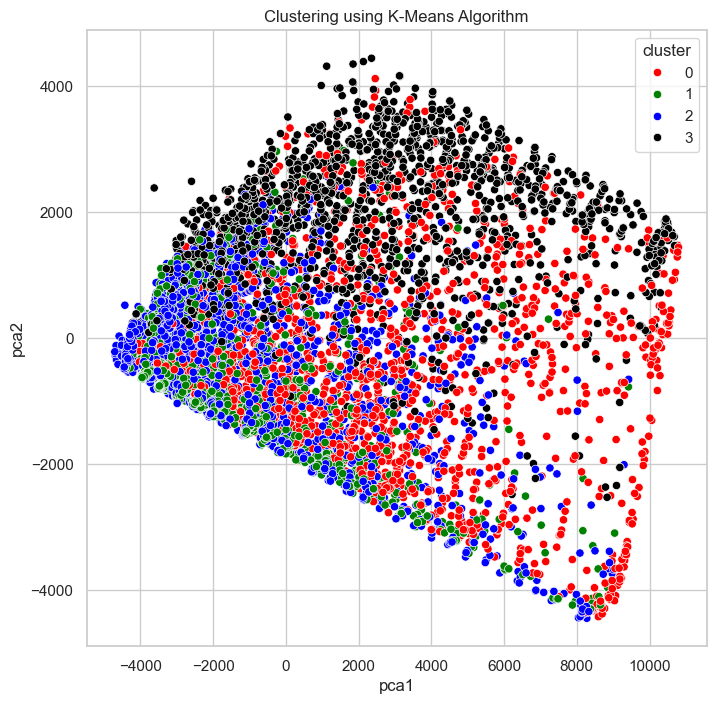

,cluster
0,2
1,3
2,0
3,2
4,2
...,...
8945,1
8946,1
8947,1
8948,2


In [114]:
KmeansClustering(customer_data_scaled,4)


##### 3.Spectrial Clustering 

In [85]:
def SpectrialClustering(df,total_clusters):
    df=df.copy()
    spectral_model = SpectralClustering(n_clusters=4)
    y_pred = spectral_model.fit_predict(df)
    pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)
 
    # Scatter Plot
    plt.figure(figsize=(8,8))
    ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl)
    plt.title("Clustering using Spectral Algorithm")
    plt.show()

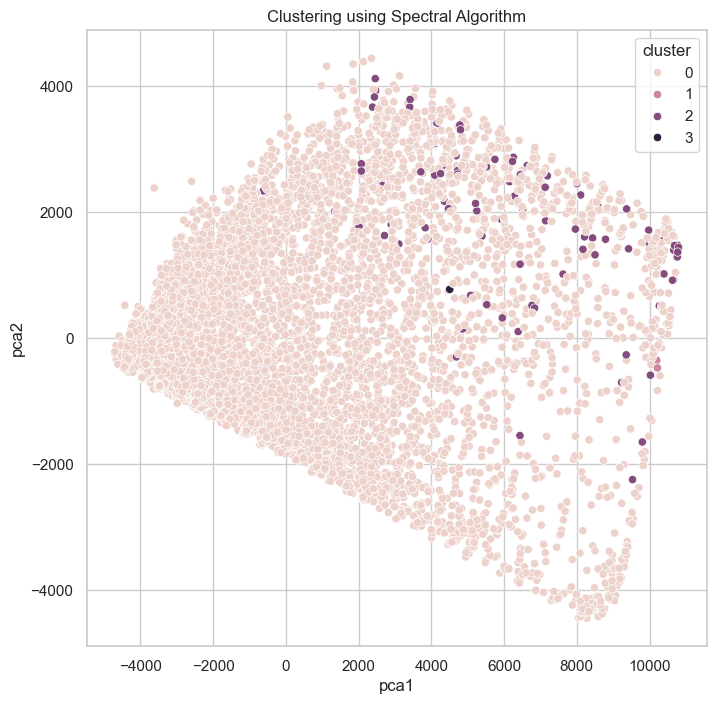

In [86]:
SpectrialClustering(customer_data_scaled,4)

In [87]:
customer_data_scaled

array([[-0.87782104, -1.02187519, -0.72968709, ..., -0.79404745,
        -0.62927738,  0.        ],
       [ 1.1785459 , -0.2027079 , -0.83815959, ...,  0.83675109,
         0.9739614 ,  0.        ],
       [ 0.71848713,  0.61645939,  0.04095652, ...,  0.05869355,
        -0.62927738,  0.        ],
       ...,
       [-0.88920486, -0.88535181, -0.67397271, ..., -0.89385616,
         1.17436805,  0.        ],
       [-0.89567082, -0.88535181, -0.83815959, ..., -0.94046866,
         1.17436805,  0.        ],
       [-0.66200474, -1.88655177,  0.40489651, ..., -0.88359305,
        -0.62927738,  0.        ]])

#### 8.1 Find The Best Clustering Technique

###### here i am using k means clustering Here we saw that all the datapoints are clstered nicely with very less errors by using k-means clustering as compared to other clustering algorithms. So we'll use K-Means model for clustering in this dataset.

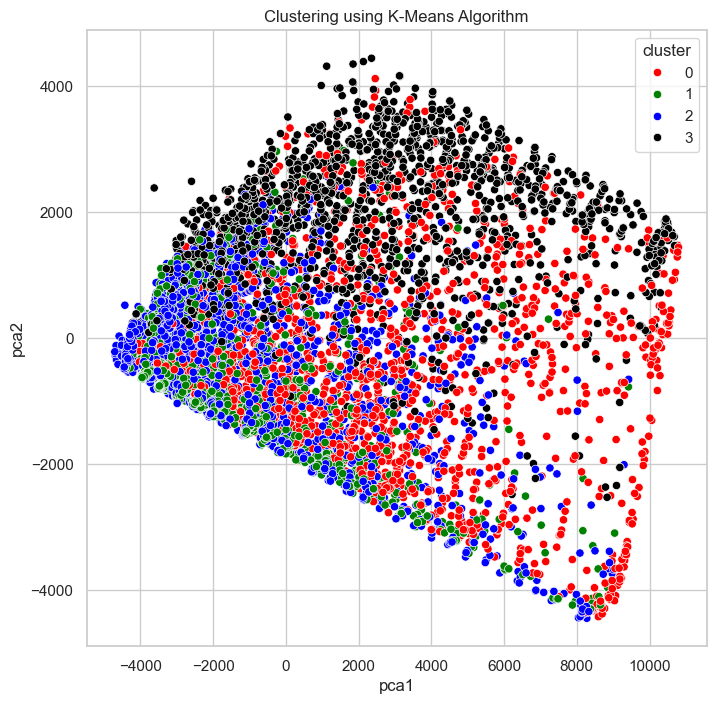

array([2, 3, 0, ..., 1, 2, 2])

In [119]:
kmeans_label=KmeansClustering(customer_data_scaled,4)
kmeans_label

##### * Analysis of Each Cluster

In [121]:
kmeans_label

8950

In [124]:
customer_data_cluster_df = pd.concat([customer_data,pd.DataFrame({'cluster':kmeans_label})],axis=1)
customer_data_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2


In [125]:
customer_data_cluster_df[customer_data_cluster_df['cluster']==1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5,1809.828751,1.000000,1333.28,0.0,1171.59375,0.0,0.666667,0.000000,0.583333,0.0,0.0,8.0,1800.0,1400.057770,1904.229874,0.000000,12.0,1
7,1823.652743,1.000000,436.20,0.0,436.20000,0.0,1.000000,0.000000,1.000000,0.0,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,1
10,1293.124939,1.000000,920.12,0.0,920.12000,0.0,1.000000,0.000000,1.000000,0.0,0.0,12.0,1200.0,1083.301007,1904.229874,0.000000,12.0,1
17,41.089489,0.722223,519.00,0.0,519.00000,0.0,0.416667,0.000000,0.333333,0.0,0.0,8.0,2500.0,254.590662,73.203221,0.250000,12.0,1
18,1989.072228,1.000000,504.35,166.0,338.35000,0.0,0.666667,0.083333,0.583333,0.0,0.0,9.0,13000.0,1720.837373,744.613395,0.000000,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.0,591.24000,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,475.523262,82.771320,0.357143,12.0,1
8942,40.829749,1.000000,113.28,0.0,113.28000,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,94.488828,86.283101,0.250000,12.0,1
8945,28.493517,1.000000,291.12,0.0,291.12000,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,325.594462,48.886365,0.357143,12.0,1
8946,19.183215,1.000000,300.00,0.0,300.00000,0.0,1.000000,0.000000,0.833333,0.0,0.0,6.0,1000.0,275.861322,864.206542,0.000000,12.0,1


In [126]:
customer_data_cluster_df[customer_data_cluster_df['cluster']==2]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.00,12.0,2
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.00,12.0,2
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.00,12.0,2
8,1014.926473,1.000000,861.49,661.4900,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.00,12.0,2
9,152.225975,0.722223,1281.60,1281.6000,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.00,12.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.4000,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2.0,2.0,1000.0,72.530037,110.950798,0.00,12.0,2
8943,5.871712,0.722223,20.90,20.9000,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,1.0,500.0,58.644883,43.473717,0.00,12.0,2
8944,193.571722,0.833333,1012.73,1012.7300,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,2.0,4000.0,0.000000,864.206542,0.00,12.0,2
8948,13.457564,0.833333,0.00,0.0000,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.25,12.0,2


In [128]:
customer_data_cluster_df[customer_data_cluster_df['cluster']==3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,3202.467416,0.909091,0.00,0.00,0.00000,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
15,4942.927215,1.000000,1611.70,0.00,1171.59375,2301.491267,0.500000,0.000000,0.500000,0.166667,4.0,11.0,8000.0,1993.439277,1904.229874,0.000000,12.0,3
24,4942.927215,1.000000,0.00,0.00,0.00000,798.949863,0.000000,0.000000,0.000000,0.363636,4.0,0.0,6000.0,1422.726707,1657.002877,0.000000,12.0,3
28,4942.927215,1.000000,387.05,204.55,182.50000,2236.145259,0.666667,0.166667,0.416667,0.555555,10.0,8.0,10500.0,1601.448347,1648.851345,0.000000,12.0,3
32,4942.927215,1.000000,324.95,324.95,0.00000,1189.533753,0.083333,0.083333,0.000000,0.166667,3.0,3.0,10500.0,1720.118876,1904.229874,0.000000,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,376.547421,0.857143,520.00,280.00,240.00000,1178.402416,0.857143,0.142857,0.714286,0.555555,9.0,7.0,1000.0,929.415656,103.927887,0.200000,12.0,3
8914,181.891981,0.722223,0.00,0.00,0.00000,1865.191764,0.000000,0.000000,0.000000,0.500000,10.0,0.0,2000.0,4177.921543,88.057892,0.357143,12.0,3
8915,381.341657,1.000000,78.00,0.00,78.00000,934.808869,1.000000,0.000000,0.833333,0.555555,10.0,6.0,1000.0,143.118373,85.152441,0.000000,12.0,3
8917,1880.817982,1.000000,0.00,0.00,0.00000,2335.949930,0.000000,0.000000,0.000000,0.333333,5.0,0.0,2500.0,221.568190,374.197621,0.000000,12.0,3


In [130]:
customer_data_cluster_df[customer_data_cluster_df['cluster']==0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
6,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,41.0,13500.0,4177.921543,198.065894,0.357143,12.0,0
12,1516.928620,1.000000,2715.8725,1443.5125,717.76000,0.000000,1.000000,0.250000,0.916667,0.000000,0.0,26.0,3000.0,608.263689,490.207013,0.250000,12.0,0
13,921.693369,1.000000,2137.9300,419.9600,1171.59375,0.000000,0.750000,0.166667,0.750000,0.000000,0.0,26.0,7500.0,1655.891435,251.137986,0.083333,12.0,0
21,4942.927215,1.000000,2715.8725,1443.5125,449.91000,229.028245,1.000000,0.750000,1.000000,0.333333,6.0,41.0,11250.0,2077.959051,1659.775075,0.000000,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1812.542545,0.857143,2715.8725,1443.5125,0.00000,0.000000,0.571429,0.571429,0.000000,0.000000,0.0,5.0,3000.0,247.249275,297.395431,0.000000,12.0,0
8801,275.020950,1.000000,1943.0000,1443.5125,0.00000,0.000000,0.600000,0.600000,0.000000,0.000000,0.0,9.0,500.0,1438.120632,142.241273,0.357143,12.0,0
8856,227.220411,1.000000,1387.6000,288.5400,1099.06000,107.660394,1.000000,0.750000,0.875000,0.125000,1.0,41.0,1000.0,1217.473837,136.283049,0.142857,12.0,0
8897,328.686581,1.000000,2715.8725,1443.5125,218.25000,0.000000,0.857143,0.714286,0.285714,0.000000,0.0,26.0,1200.0,1796.886852,93.017466,0.250000,12.0,0


In [132]:
customer_data_cluster_df.to_csv("data/customer_data_cluster_df")